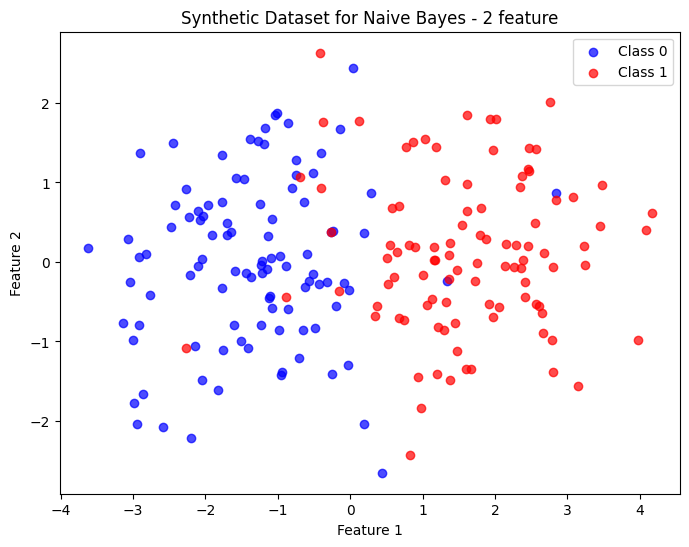

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 0", alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 1", alpha=0.7)
plt.title("Synthetic Dataset for Naive Bayes - 2 feature")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [25]:
class Naive_Bayes:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {} # P(c)
        
        self.feature_means = {} # μ
        self.feature_stds = {} # σ

        for c in self.classes:
            class_count = np.sum(y == c)
            self.class_priors[c] = class_count / len(y)
            
            X_c = X[y == c]
            self.feature_means[c] = X_c.mean(axis=0)
            self.feature_stds[c] = X_c.std(axis=0)

    def predict(self, X):
        predictions = []

        for x in X:
            class_posteriors = []

            for c in self.classes:
                prior_log = np.log(self.class_priors[c]) # P(c)
                likelihood_log = np.sum(np.log(self.gaussian(x, c))) # P(x_i|c) 
                class_posteriors.append(prior_log + likelihood_log)
            predictions.append(self.classes[np.argmax(class_posteriors)])
        return np.array(predictions)

    def gaussian(self, x, c):
        mean = self.feature_means[c]
        std = self.feature_stds[c]

        likelihood = (1/((np.sqrt(2 * np.pi)) * std)) * np.exp(-(((x - mean) ** 2) / (2 * (std ** 2))))
        return likelihood


In [26]:
model = Naive_Bayes()
model.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%
